# Visualize Binary File as Image

In [3]:
import sys
import os
import hashlib
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from cryptography.fernet import Fernet

In [4]:
# see https://gist.github.com/cbwar/d2dfbc19b140bd599daccbe0fe925597
def sizeof_fmt(num, suffix='b'):
    """Readable file size
    :param num: Bytes value
    :type num: int
    :param suffix: Unit suffix (optionnal) default = o
    :type suffix: str
    :rtype: str
    """
    for unit in ['', 'k', 'M', 'G', 'T', 'P', 'E', 'Z']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

BUF_SIZE = 65536  # lets read data in 64kb chunks!

def show_input_file(input_file):
    md5 = hashlib.md5()
    sha1 = hashlib.sha1()

    with open(input_file, 'rb') as f:
        while True:
            data = f.read(BUF_SIZE)
            if not data:
                break
            md5.update(data)
            sha1.update(data)

    md5 = md5.hexdigest()
    sha1 = sha1.hexdigest()

    print("file", input_file)
    print("MD5: {0}".format(md5))
    print("SHA1: {0}".format(sha1))

    arr = np.fromfile(input_file, dtype=np.ubyte)

    filesize = len(arr)
    filesize_text = sizeof_fmt(filesize)
    print("size:", filesize_text)

    linelength = math.ceil(math.sqrt(len(arr)))
    len_missing = (linelength**2 - len(arr))

    # add zero padding so we have proper square
    arr_padded = np.pad(arr, (0, len_missing), mode="constant", constant_values=0)
    del arr

    # reshape into quadratic matrix
    matrix = arr_padded.reshape(linelength, linelength)
    del arr_padded

    input_filename = os.path.basename(input_file)
    output_filename = input_filename + ".png"

    # see https://www.geeksforgeeks.org/matplotlib-pyplot-pcolormesh-in-python/
    fig, ax = plt.subplots()
    ax.matshow(matrix)
    del matrix

    ax.set_xlabel("SHA1: " + sha1 + "\nMD5: " + md5)
    #plt.ylim(0, 1000)  # Set the y-axis limits
    #plt.xlim(0, 1000)  # Set the x-axis limits
    plt.title(input_filename + " (" + sizeof_fmt(filesize) + ")", loc="left", fontweight="bold")
    plt.show()

file C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_images\ost_campus_buchs.jpg
MD5: 9b05d827b7983714e38424f48ef3ad35
SHA1: 01aa80fbca4fe16cc6ecd48da61dcd7cd34c2812
size: 105.5 kb


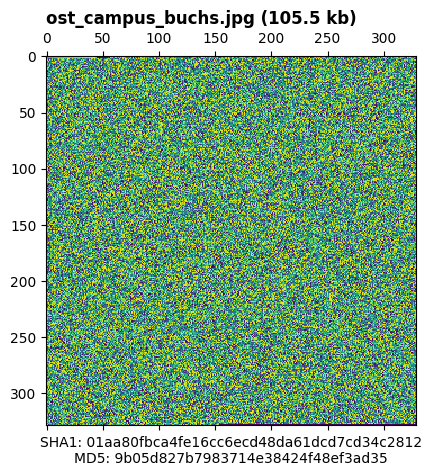

In [5]:
input_jpg = "C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_images\ost_campus_buchs.jpg"
show_input_file(input_jpg)

file C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_images\ost_campus_buchs.png
MD5: 38f65e79f537275adc123676ec4aa6c9
SHA1: 1ae8d534027a855dfeee7648e4ed96e2c09eb068
size: 566.7 kb


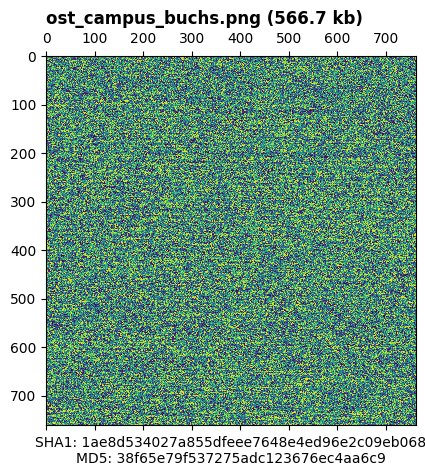

In [6]:
input_png = "C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_images\ost_campus_buchs.png"
show_input_file(input_png)

file C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_images\ost_campus_buchs.gif
MD5: c1e0d0d83df5e28069a0ef547c9dd5b1
SHA1: 1a5bef4d852048480ad3918ebebc11e450c3f894
size: 126.1 kb


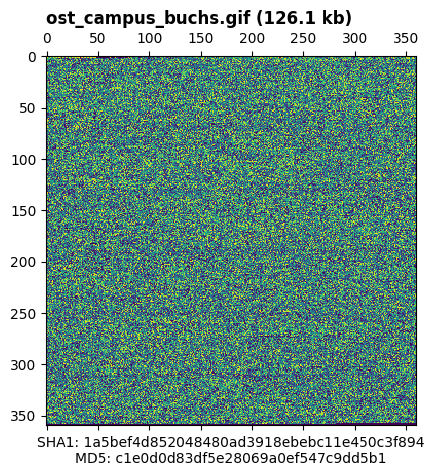

In [7]:
input_gif = "C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_images\ost_campus_buchs.gif"
show_input_file(input_gif)

file C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_images\ost_campus_buchs.bmp
MD5: 32b3e634dab60ccd9d4cf1a5be2f973c
SHA1: c13774b496fa8088b364ebe1e728f428aec9ec18
size: 769.9 kb


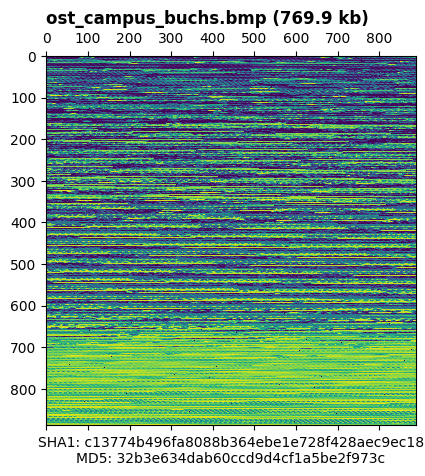

In [8]:
input_bmp = "C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_images\ost_campus_buchs.bmp"
show_input_file(input_bmp)

file C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_files\unprotected_excel.xlsx
MD5: e49e99f3a7ec717acd058ab777fbfaf8
SHA1: ec0aa94a1bacacb34b2c0d64fb48b7b7e69c5226
size: 9.0 kb


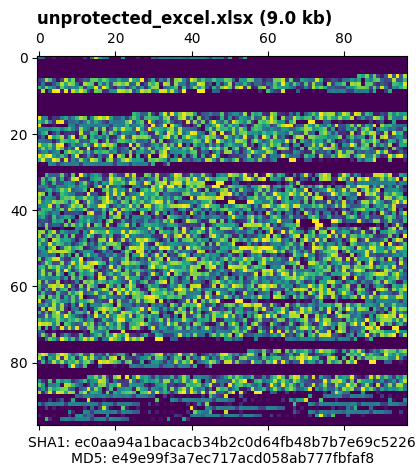

In [9]:
unprotected_excel = r'C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_files\unprotected_excel.xlsx'
show_input_file(unprotected_excel)

file C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_files\protected_excel.xlsx
MD5: ae56f7c02db50d394192bdcf53613576
SHA1: 180b68c934b547b8124c28f6f1b2f4debc5d3641
size: 9.4 kb


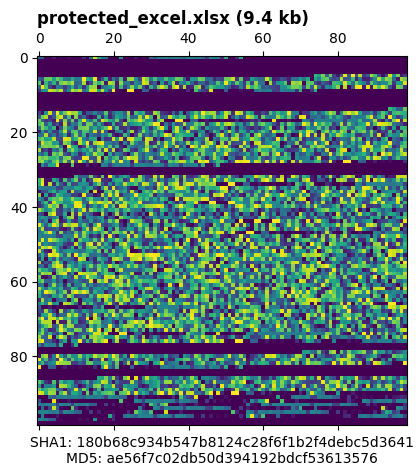

In [10]:
protected_excel = r"C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_files\protected_excel.xlsx"
show_input_file(protected_excel)

In [11]:
# Generate a random encryption key
encryption_key = Fernet.generate_key()

# Create a Fernet cipher object with the encryption key
cipher = Fernet(encryption_key)

# Read the document content
with open(protected_excel, 'rb') as file:
    document_content = file.read()

# Encrypt the document content
encrypted_content = cipher.encrypt(document_content)

file_location = os.path.dirname(protected_excel)

# Write the encrypted content to a new file
with open(str(file_location + '\encrypted.xlsx'), 'wb') as file:
    file.write(encrypted_content)

file C:\Git\SecurityDataVisualization\Visualize Binary File as Image\example_files\encrypted.xlsx
MD5: 5b6b32b385af98f536ff87c104447654
SHA1: d478d453f866423cac7285dfcf9fe209af891e0e
size: 12.6 kb


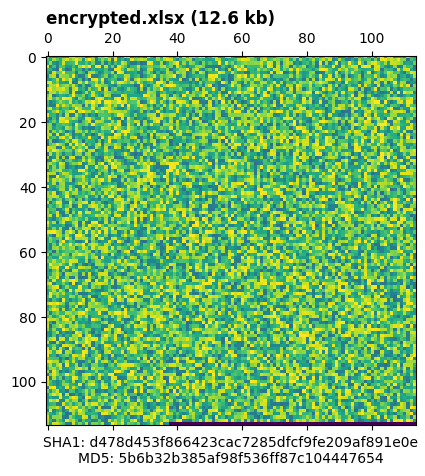

In [12]:
encrypted_file = str(file_location + '\encrypted.xlsx')
show_input_file(encrypted_file)